# Paramètres (temps, stations et requêtes)

In [16]:
# Time limit
T = 20

# Stations number
D = 10

# Requests number
R = 10

# Création des R requests (random)

In [17]:
from random import seed
from random import randint

# seed random number generator
seed(1)

requests_list = []

for i in range(R):
    t1 = randint(0,T-1)
    t2 = randint(t1+1,T)
    d1 = randint(0,D-1)
    d2 = randint(d1+1,D)
    r = (d1,d2,t1,t2)
    requests_list.append(r)
requests_list

[(4, 5, 4, 7),
 (7, 10, 15, 19),
 (1, 9, 12, 16),
 (6, 7, 0, 13),
 (3, 8, 14, 17),
 (0, 1, 3, 14),
 (0, 7, 0, 18),
 (0, 9, 6, 13),
 (7, 9, 7, 20),
 (5, 7, 17, 18)]

# Vrai manque de visibilité des rectangles

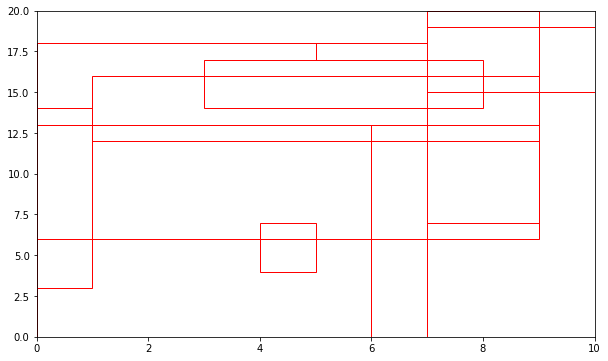

In [18]:
from pylab import *
import matplotlib.pyplot as plt
import matplotlib.patches as patches


# Create the window itself

fig, ax = plt.subplots(figsize=(10, 6))

xlim(0,10)
ylim(0,20)

# Create the rectangles "patchs"
for i in range(R):
    a = requests_list[i]
    rect = patches.Rectangle((a[0],a[2]),a[1]-a[0],a[3]-a[2], linewidth=1, edgecolor='r', facecolor='none')

# Add the rectangle to the Axes
    ax.add_patch(rect)

plt.show()

# Clique creation in the graph

r et s sont COMPATIBLES si r_left < s_left et r_bot < s_top

                    et si r_top > s_bot si s_left < r_right
                    
dans requests_list, ça donne (d1,d2,t1,t2) = (r_left, r_right, r_bot, r_top)

On stocke dans E les paires "compatibles"

In [22]:
# Les nodes sont dans V
V = requests_list
E = []

for i in range(R):
    for j in range(R-1-i):
        V1 = V[i]
        V2 = V[R-j-1]
        #print(i,R-j-1)  # On les a bien tous
        #print(V1,V2)
        
        # On regarde qui est le plus à gauche, on renomme si besoin
        if V1[0] > V2[0]:
            a = V2
            V2 = V1
            V1 = a
            #print(V1,V2)
            
        if V1[2] <= V2[3]:  # r_bot < r'_top
            
            if V1[1] <= V2[0]:
                E.append((i,R-j-1))
            
            elif V1[3] >= V2[2]:
                E.append((i,R-j-1))
print(E)

[(0, 9), (0, 8), (0, 7), (0, 6), (0, 5), (0, 3), (0, 1), (1, 9), (1, 8), (1, 6), (1, 5), (1, 4), (1, 3), (1, 2), (2, 8), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3), (3, 8), (3, 7), (3, 6), (3, 5), (4, 9), (4, 8), (4, 6), (4, 5), (5, 9), (5, 8), (5, 7), (5, 6), (6, 9), (6, 8), (6, 7), (7, 8), (8, 9)]


# Clique selection avec Gurobi

In [28]:
from gurobipy import *
import gurobipy as gp

try:
    # Create the model
    m = gp.Model("task_1")
    
    # Create variables
    liste = range(R)
    x = m.addVars(liste, vtype=GRB.BINARY, name = "x")
    
    # Set objective
    m.setObjective(quicksum(x), GRB.MAXIMIZE)
    
    # Set constraints
    print(E)
    for i in range(R):
        E_i = []
        for j in range(R):
            if i != j and (i,j) not in E and (j,i) not in E:
                E_i.append(j)
        print(i,E_i)
        m.addConstrs((x[i] + x[k] <= 1 for k in E_i), name='')
    m.optimize()  
finally:
    
    print(x)

[(0, 9), (0, 8), (0, 7), (0, 6), (0, 5), (0, 3), (0, 1), (1, 9), (1, 8), (1, 6), (1, 5), (1, 4), (1, 3), (1, 2), (2, 8), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3), (3, 8), (3, 7), (3, 6), (3, 5), (4, 9), (4, 8), (4, 6), (4, 5), (5, 9), (5, 8), (5, 7), (5, 6), (6, 9), (6, 8), (6, 7), (7, 8), (8, 9)]
0 [2, 4]
1 [7]
2 [0, 9]
3 [4, 9]
4 [0, 3, 7]
5 []
6 []
7 [1, 4, 9]
8 []
9 [2, 3, 7]
Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 16 rows, 10 columns and 32 nonzeros
Model fingerprint: 0xa1ffaeeb
Variable types: 0 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 6.0000000
Presolve removed 11 rows and 5 columns
Presolve time: 0.00s
Presolved: 5 rows, 5 columns, 10 nonzeros
Variable types: 0 continuous, 5 integer

In [24]:
# Faudrait voir à sortir les numéros sélectionnés directement depuis la réponse de Gurobi
# et non pas "à la main"

# R = 10
Z = (0,1,3,5,6,8)

# R = 5
#Z = (1,2,3)

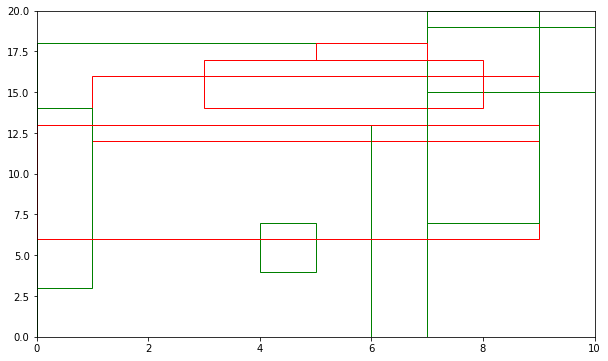

In [25]:
from pylab import *
import matplotlib.pyplot as plt
import matplotlib.patches as patches


# Create the window itself

fig, ax = plt.subplots(figsize=(10, 6))

xlim(0,10)
ylim(0,20)

# Create the rectangles "patchs"
for i in range(R):
    a = requests_list[i]
    if i in Z:
        rect = patches.Rectangle((a[0],a[2]),a[1]-a[0],a[3]-a[2], linewidth=1, edgecolor='g', facecolor='none')
    else:
        rect = patches.Rectangle((a[0],a[2]),a[1]-a[0],a[3]-a[2], linewidth=1, edgecolor='r', facecolor='none')
        
# Add the rectangle to the Axes
    ax.add_patch(rect)

plt.show()

[(4, 5, 4, 7), (7, 10, 15, 19), (6, 7, 0, 13), (0, 1, 3, 14), (0, 7, 0, 18), (7, 9, 7, 20)]
[0, 0, 4, 6, 7, 7, 10]
[0, 3, 3, 4, 4, 7, 15]


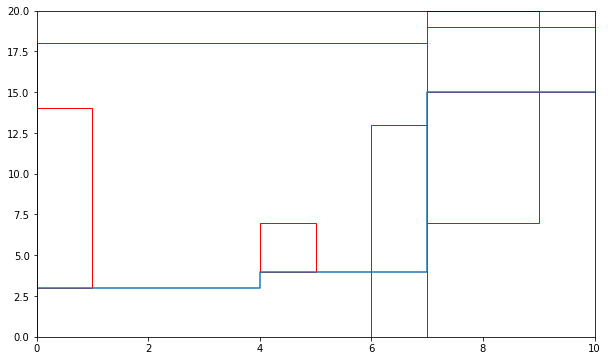

In [29]:
new_list = []
for i in range(R):
    a = requests_list[i]
    if i in Z:
        new_list.append(a)
print(new_list)


fig, ax = plt.subplots(figsize=(10, 6))
xlim(0,10)
ylim(0,20)

for i in range(len(new_list)):
    a = new_list[i]
    rect = patches.Rectangle((a[0],a[2]),a[1]-a[0],a[3]-a[2], linewidth=1, edgecolor='r', facecolor='none')
     
    ax.add_patch(rect)

# Add the stairs  
x = []
y = []
y.append(0)
ordre = sorted(new_list)
for i in range(len(ordre)):
    x.append(ordre[i][0])
    if i == 0:
        y.append(ordre[i][2])
    else:
        y.append(max(ordre[i][2], y[i]))
x.append(D)
print(x)
print(y)
plt.step(x, y)    

plt.show()

# Voir le stair dans tous les rectangles d'entrée

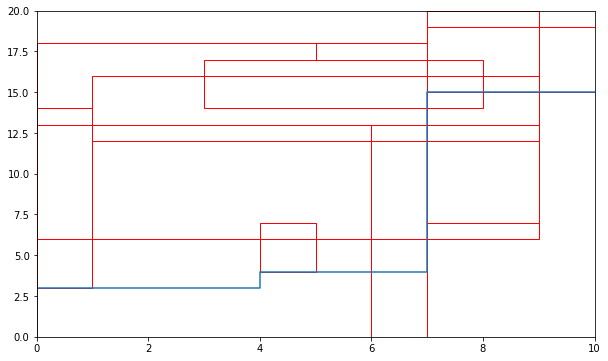

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))

xlim(0,10)
ylim(0,20)

# Create the rectangles "patchs"
for i in range(R):
    a = requests_list[i]
    rect = patches.Rectangle((a[0],a[2]),a[1]-a[0],a[3]-a[2], linewidth=1, edgecolor='r', facecolor='none')

# Add the rectangle to the Axes
    ax.add_patch(rect)

plt.step(x, y) 
    
plt.show()